In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
logs = '/ZPOOL/data/projects/sharedreward-aging/code/combined_logs_with_age.csv' # This df stores the logs and age
logs_df = pd.read_csv(logs)

In [11]:
fmri_metrics = '/ZPOOL/data/projects/sharedreward-aging/code/fmri-metrics.csv' # This df stores tsnr and fdmean 
metrics_df = pd.read_csv(fmri_metrics)

In [12]:
fsl_inputs = '/ZPOOL/data/projects/sharedreward-aging/code/L3inputs.csv' # This df stores the relevant FSL inputs
fsl_df = pd.read_csv(fsl_df)

In [13]:
#flip_angle = '/ZPOOL/data/projects/sharedreward-aging/code/flipangle.csv' # This df stores the flip angle designation to be used for dummy variable coding
#angle_df = pd.read_csv(flip_angle)

In [22]:
# This cell is used to clean the logs files so that each sub only has one row

# Pivot the dataframe to reshape it so that each subject has a single row
pivot_df = logs_df.pivot_table(index='sub', columns=['partner', 'trait'], values='response')

# Flatten the MultiIndex columns
pivot_df.columns = [f'partner_{col[0]}_trait_{col[1]}' for col in pivot_df.columns]

# Merge the age information back
pivot_df = pivot_df.merge(logs_df[['sub', 'age']].drop_duplicates(), on='sub', how='left')

# Reset index to make 'sub' a column again
pivot_df.reset_index(inplace=True)

# Print the shape of the reformatted dataframe
print("Shape of the reformatted dataframe:", pivot_df.shape)
display(pivot_df.head())

Shape of the reformatted dataframe: (166, 9)


,index,sub,partner_1_trait_0,partner_1_trait_1,partner_2_trait_0,partner_2_trait_1,partner_3_trait_0,partner_3_trait_1,age
0,0,103,1.0,0.0,1.0,0.0,3.0,1.0,NaN
1,1,104,5.0,-1.0,5.0,0.0,5.0,0.0,20.0
2,2,107,0.0,0.0,5.0,0.0,5.0,-2.0,23.0
3,3,108,1.0,0.0,4.0,-3.0,5.0,-5.0,21.0
4,4,111,5.0,0.0,5.0,5.0,5.0,5.0,80.0


In [23]:
# Load the reformatted CSV file
data = pivot_df
# List of partner combinations
partner_pairs = [(3, 2), (3, 1)]

# Create a new DataFrame to store the differences
diff_df = pd.DataFrame()

# Iterate over each trait
for trait in [0, 1]:
    for (p1, p2) in partner_pairs:
        # Generate the column names
        col1 = f'partner_{p1}_trait_{trait}'
        col2 = f'partner_{p2}_trait_{trait}'
        
        # Calculate the difference
        diff_col_name = f'diff_partner_{p1}_{p2}_trait_{trait}'
        diff_df[diff_col_name] = data[col1] - data[col2]

# Merge the differences with the original data
result_df = pd.concat([data, diff_df], axis=1)

# Print the first few rows of the resulting DataFrame
print("Resulting DataFrame with Differences:")
display(result_df.head())

Resulting DataFrame with Differences:


,index,sub,partner_1_trait_0,partner_1_trait_1,partner_2_trait_0,partner_2_trait_1,partner_3_trait_0,partner_3_trait_1,age,diff_partner_3_2_trait_0,diff_partner_3_1_trait_0,diff_partner_3_2_trait_1,diff_partner_3_1_trait_1
0,0,103,1.0,0.0,1.0,0.0,3.0,1.0,NaN,2.0,2.0,1.0,1.0
1,1,104,5.0,-1.0,5.0,0.0,5.0,0.0,20.0,0.0,0.0,0.0,1.0
2,2,107,0.0,0.0,5.0,0.0,5.0,-2.0,23.0,0.0,5.0,-2.0,-2.0
3,3,108,1.0,0.0,4.0,-3.0,5.0,-5.0,21.0,1.0,4.0,-2.0,-5.0
4,4,111,5.0,0.0,5.0,5.0,5.0,5.0,80.0,0.0,0.0,0.0,5.0


In [16]:
# Merge vsmean_stan and fd_mean columns based on the 'sub' column and display the table
result_df = pd.merge(result_df, metrics_df[['sub', 'average_vs_mean', 'average_fd_mean']], on='sub', how='left')
display(result_df)

,index,sub,partner_1_trait_0,partner_1_trait_1,partner_2_trait_0,partner_2_trait_1,partner_3_trait_0,partner_3_trait_1,age,diff_partner_3_2_trait_0,diff_partner_3_1_trait_0,diff_partner_3_2_trait_1,diff_partner_3_1_trait_1,average_vs_mean,average_fd_mean
0,0,103,1.0,0.0,1.0,0.0,3.0,1.0,NaN,2.0,2.0,1.0,1.0,NaN,NaN
1,1,104,5.0,-1.0,5.0,0.0,5.0,0.0,20.0,0.0,0.0,0.0,1.0,92.930981,0.079889
2,2,107,0.0,0.0,5.0,0.0,5.0,-2.0,23.0,0.0,5.0,-2.0,-2.0,107.685720,0.083266
3,3,108,1.0,0.0,4.0,-3.0,5.0,-5.0,21.0,1.0,4.0,-2.0,-5.0,79.120289,0.143051
4,4,111,5.0,0.0,5.0,5.0,5.0,5.0,80.0,0.0,0.0,0.0,5.0,40.420356,0.282958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,161,11063,3.0,-1.0,3.0,-2.0,5.0,-4.0,21.0,2.0,2.0,-2.0,-3.0,NaN,NaN
162,162,11064,5.0,-5.0,0.0,-4.0,5.0,-2.0,22.0,5.0,0.0,2.0,3.0,NaN,NaN
163,163,11068,0.0,0.0,4.0,0.0,4.0,4.0,43.0,0.0,4.0,4.0,4.0,NaN,NaN
164,164,11071,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,NaN,NaN


In [ ]:
# Merge L3 inputs based on sub-### input
result_df = pd.merge(result_df, metrics_df[['sub', 

In [17]:
# Exclude the subject ID column
data = result_df
table = result_df[['age', 'diff_partner_3_2_trait_0', 'diff_partner_3_2_trait_1', 'diff_partner_3_1_trait_0', 'diff_partner_3_1_trait_1', 'average_fd_mean', 'average_vs_mean']]

print(table.corr)

<bound method DataFrame.corr of       age  diff_partner_3_2_trait_0  diff_partner_3_2_trait_1  \
0     NaN                       2.0                       1.0   
1    20.0                       0.0                       0.0   
2    23.0                       0.0                      -2.0   
3    21.0                       1.0                      -2.0   
4    80.0                       0.0                       0.0   
..    ...                       ...                       ...   
161  21.0                       2.0                      -2.0   
162  22.0                       5.0                       2.0   
163  43.0                       0.0                       4.0   
164  62.0                       0.0                       0.0   
165  25.0                       5.0                       0.0   

     diff_partner_3_1_trait_0  diff_partner_3_1_trait_1  average_fd_mean  \
0                         2.0                       1.0              NaN   
1                         0.0      

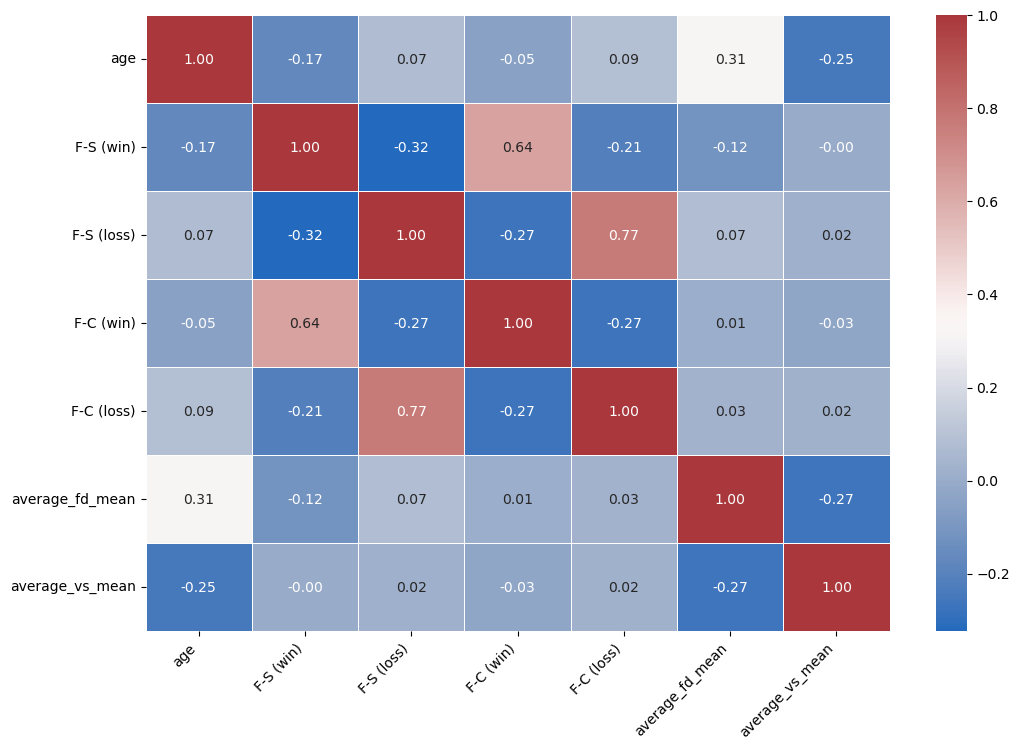

In [18]:
# Custom labels
custom_labels = {
    'diff_partner_3_2_trait_0': 'F-S (win)',
    'diff_partner_3_2_trait_1': 'F-S (loss)',
    'diff_partner_3_1_trait_0': 'F-C (win)',
    'diff_partner_3_1_trait_1': 'F-C (loss)'
}

# Apply custom labels
custom_labels_list = [custom_labels.get(item, item) for item in table.columns]

# Set the figure size
plt.figure(figsize=(12, 8))

# Generate the heatmap
heatmap = sns.heatmap(table.corr(), cmap='vlag', annot=True, fmt=".2f", linewidths=.5)

# Apply custom labels
heatmap.set_xticklabels(custom_labels_list, rotation=45, ha='right')
heatmap.set_yticklabels(custom_labels_list, rotation=0)

# Display the heatmap
plt.show()